In [1]:
#IMPORTS

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
df = pd.read_excel('Data for IIS-Lab Assignment.xlsx')

# df.drop(df.columns[[0, 2, 5, 13, 15, 16]], axis = 1, inplace = True)
# df.drop(df.columns[[0, 2, 13, 14, 15]], axis = 1, inplace = True)
# df.drop(df.columns[[0, 2, 7, 13]], axis = 1, inplace = True)

df.drop(df.columns[[0, 2, 13]], axis = 1, inplace = True)

df = pd.get_dummies(df)

y = df['High-Salary']
x = df.drop(['High-Salary'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.9, shuffle= False)

In [11]:
model = LogisticRegression(max_iter = 50000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=50000)

True Value - 


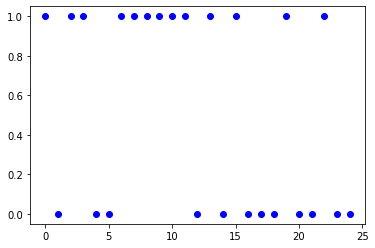

Predicted Value - 


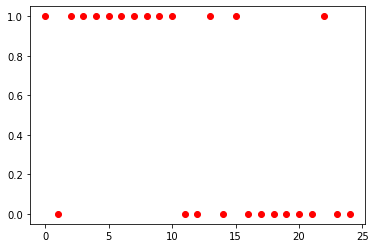

In [12]:
prediction = model.predict(x_test)
x_arr = []
for i in range(25):
    x_arr.append(i)

print("True Value - ")
plt.scatter(x_arr, y_test[0:25], c = 'blue')
plt.show()
print("Predicted Value - ")
plt.scatter(x_arr, prediction[0:25], c = 'red')
plt.show()

In [13]:
print("Accuracy of my Logistic Regression model is - ",model.score(x_test, y_test)*100,"%")

Accuracy of my Logistic Regression model is -  72.5 %


In [14]:
prediction.reshape(1, -1)

#Printing Confusion Matrix

cm = confusion_matrix(y_test, prediction)
print("CONFUSION MATRIX - ")
for i in cm:
    print('\t',i)

CONFUSION MATRIX - 
	 [135  51]
	 [ 59 155]


In [15]:
#Normalising the Confusion Matrix

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("NORMALIZED CONFUSION MATRIX - ")
for i in cm:
    print('\t',i)

NORMALIZED CONFUSION MATRIX - 
	 [0.72580645 0.27419355]
	 [0.27570093 0.72429907]


In [16]:
# Printing Class-Wise Accuracies
cw_acc = cm.diagonal()
print("CLASS-WISE ACCURACIES - ")
for i in range(len(cw_acc)):
    print("\tAcuuracy of",i,"is -", cw_acc[i]*100,"%")

CLASS-WISE ACCURACIES - 
	Acuuracy of 0 is - 72.58064516129032 %
	Acuuracy of 1 is - 72.42990654205607 %


In [9]:
print(classification_report(y_test, prediction, labels=[1, 2, 3], zero_division=0))

              precision    recall  f1-score   support

           1       0.73      0.71      0.72       214
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.73      0.71      0.72       214
   macro avg       0.24      0.24      0.24       214
weighted avg       0.73      0.71      0.72       214

